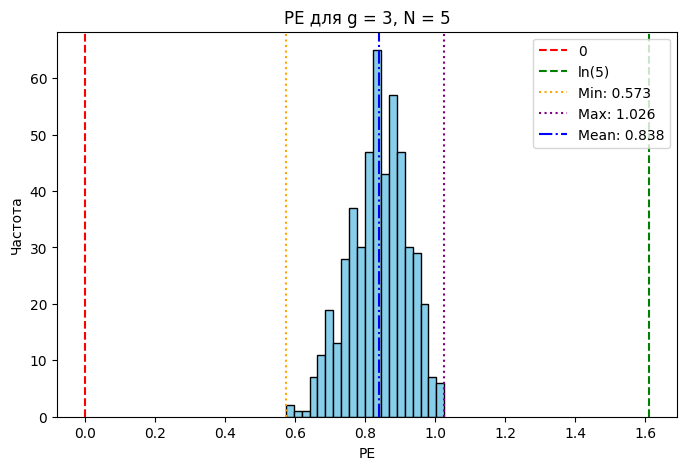

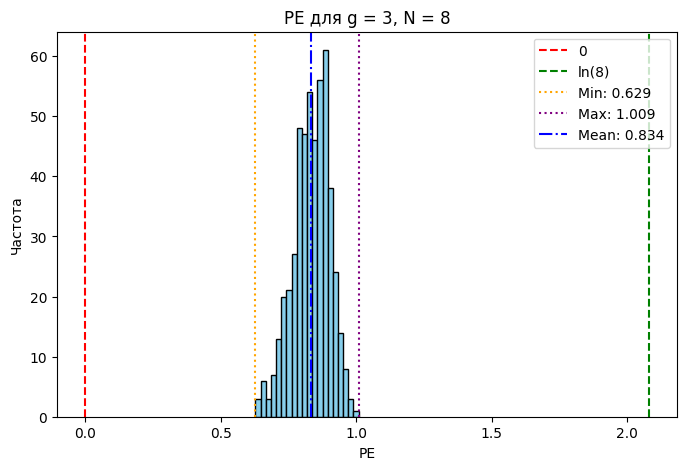

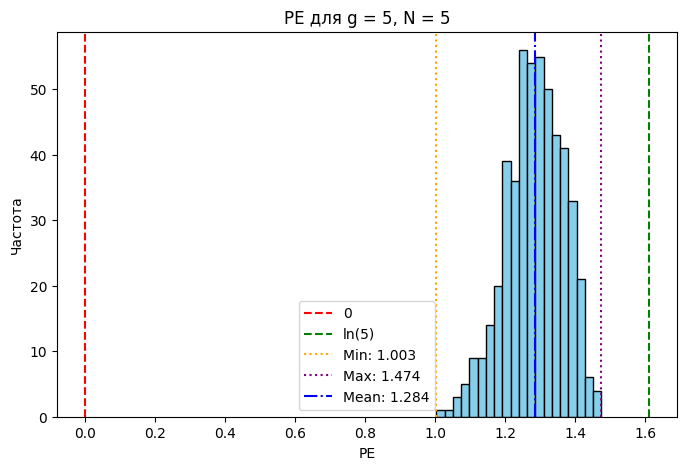

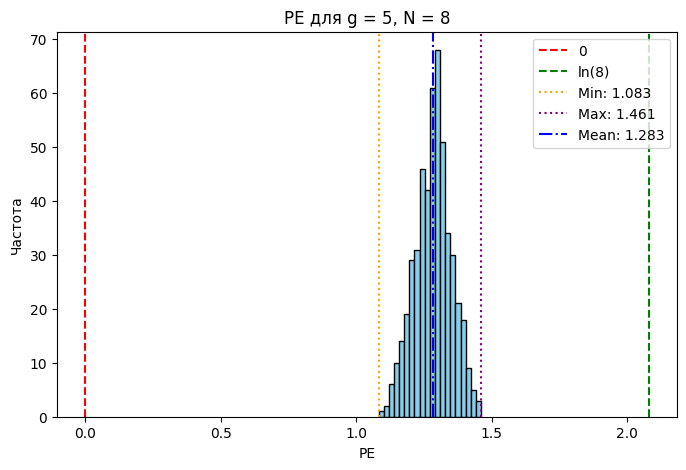

In [2]:
# Бібліотеки
import numpy as np
import matplotlib.pyplot as plt

# Функція для генерування матриці розбиття
def generate_matrices(g, N, num):
    matrices = []
    # Фіксований seed для відтворюваності результатів
    rng = np.random.default_rng(42)
    while len(matrices) < num:
        # Генерування масиву випадкових векторів з розподілу Діріхле та транспонування матриці
        U = rng.dirichlet(np.ones(g), size=N).T
        row_sums = U.sum(axis=1)
        # Перевірка
        if np.all(row_sums < N):
            matrices.append(U)
    
    return matrices

# Функція для обчислення ентропії розбиття
def partition_entropy(U):
    # Уникання log(0)
    U_nonzero = np.where(U > 0, U, 1)
    entropy_matrix = U * np.log(U_nonzero)
    PE = -np.sum(entropy_matrix) / U.shape[1]
    return PE

# Функція для зображення результатів на гістограмі
def histogram(values, N, title = "Гістограма ентропії розбиття (PE)"):
    plt.figure(figsize = (8,5))
    bins = 20  
    plt.hist(values, bins = bins, color = 'skyblue', edgecolor = 'black')

    # Межі 0 та ln(N)
    plt.axvline(0, color = 'red', linestyle = '--', label = '0')
    plt.axvline(np.log(N), color = 'green', linestyle = '--', label = f'ln({N})')

    # Мін, макс, середнє
    min_val = np.min(values)
    max_val = np.max(values)
    mean_val = np.mean(values)
    plt.axvline(min_val, color='orange', linestyle=':', label=f'Min: {min_val:.3f}')
    plt.axvline(max_val, color='purple', linestyle=':', label=f'Max: {max_val:.3f}')
    plt.axvline(mean_val, color='blue', linestyle='-.', label=f'Mean: {mean_val:.3f}')

    plt.title(title)
    plt.xlabel("PE")
    plt.ylabel("Частота")
    plt.legend()
    plt.show()

# Головна функція
def main_experiment(g_values, N_values, num_samples):
    for g in g_values:
        for N in N_values:
            matrices = generate_matrices(g, N, num_samples)
            results = [partition_entropy(U) for U in matrices]
            histogram(results, N, title = f"PE для g = {g}, N = {N}")

# Виклик головної функції для різних початкових умов
g_values = [3, 5]
N_values = [5, 8]
num_samples = 500
main_experiment(g_values, N_values, num_samples)